In [22]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import regex as re

First let's load our raw data: tweets by Donald Trump.

In [23]:
data = pd.read_csv("../data/tweets_01-08-2021.csv")
print(data.shape)

(56571, 9)


We have ~56000 rows and 9 features. Let's take a look at some rows in our dataframe

In [24]:
data.head(10)

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f
5,1217962723234983937,RT @WhiteHouse: President @realDonaldTrump ann...,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56,f
6,1223640662689689602,Getting a little exercise this morning! https:...,f,f,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,f
7,1319501865625784320,https://t.co/4qwCKQOiOw,f,f,Twitter for iPhone,130822,19127,2020-10-23 04:52:14,f
8,1319500520126664705,https://t.co/VlEu8yyovv,f,f,Twitter for iPhone,153446,20275,2020-10-23 04:46:53,f
9,1319500501269041154,https://t.co/z5CRqHO8vg,f,f,Twitter for iPhone,102150,14815,2020-10-23 04:46:49,f


Interesting, we have quite a lot of information on his tweets. We know the date, device, how many favorites and retweets it received, whether it was a retweet itself, and whether it was deleted, which is our outcome feature in this project. For the text itself, we can see that some tweets have the plain text itself, while others have "RT" text and links cluttering the text. We'll have to handle that as we analyze the text closely.

First, let's graph the frequency of tweets over time, to get an idea of our spread over time.

In [25]:
data['date']=pd.to_datetime(data['date'])
date_group = data
date_group.index = pd.to_datetime(data['date'])
date_group = data.groupby(pd.Grouper(freq='M')).count()
date_group = date_group["id"]
#date_group.head()
date_group.index[-1]

Timestamp('2021-01-31 00:00:00', freq='M')

Text(0.5, 1.0, 'Trump Tweet Frequency')

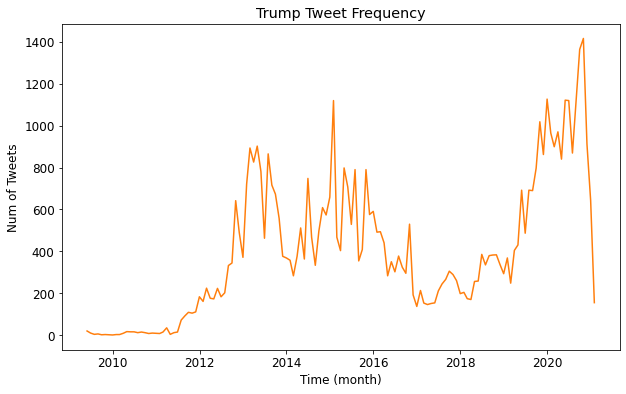

In [12]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(date_group.index, date_group, color='tab:orange')

# Same as above
ax.set_xlabel('Time (month)')
ax.set_ylabel('Num of Tweets')
ax.set_title('Trump Tweet Frequency')

There are some expected and unexpected results from this graph. Expectedly, we see that Trump's tweet frequency follows US election cycles, picking up 2015-2016 and 2019-2020. What is slightly unexpected is how sharply the decline in tweets was after each election, and how many more tweets there were in the 202 election cycle as opposed to the 2016 election cycle.

Now let's see some of the ratio balances in our data. How many tweets were retweets, or deleted?

[0.007760159799190398, 0.16683459723179722]
[0.011543016740025808, 0.8138622262289866]


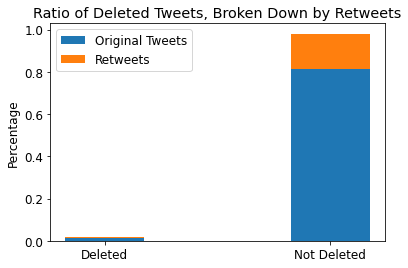

In [40]:
n = data.shape[0]
d = data.shape[1]

labels = ['Deleted', 'Not Deleted']
df_deleted = data[data['isDeleted'] == 't']
df_notdeleted = data[data['isDeleted'] == 'f']
dfs = [df_deleted, df_notdeleted]
normal_tweet_ratios = []
retweet_ratios = []

for df in dfs:
    normal_tweet_ratio = df[df['isRetweet'] == 'f'].shape[0]/n
    retweet_ratio = df[df['isRetweet'] == 't'].shape[0]/n
    normal_tweet_ratios.append(normal_tweet_ratio)
    retweet_ratios.append(retweet_ratio)

#men_means = [20, 35, 30, 35, 27]
#women_means = [25, 32, 34, 20, 25]
width = 0.35       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()
print(str(retweet_ratios) + "\n" + str(normal_tweet_ratios))

ax.bar(labels, normal_tweet_ratios, width, label='Original Tweets')
ax.bar(labels, retweet_ratios, width, bottom=normal_tweet_ratios, label='Retweets')

ax.set_ylabel('Percentage')
ax.set_title('Ratio of Deleted Tweets, Broken Down by Retweets')
ax.legend()

plt.show()

Now, let's examine the content of the tweets.

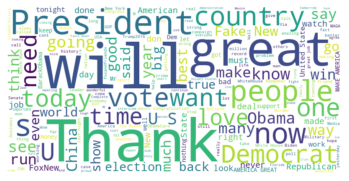

In [13]:
tweet_text =" ".join(tweet for tweet in data['text'])
tweet_text = re.sub(" &amp", ' ', tweet_text) # &amp
stopwords = set(STOPWORDS)
stopwords.update(["RT", "https", "http", "Donald", "Trump", "realDonaldTrump", "t", "co"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width = 800, height = 400).generate(tweet_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let's separate by tweets that were and weren't deleted.

In [14]:
undeleted_tweets = data[data['isDeleted'] == 'f']['text']
deleted_tweets = data[data['isDeleted'] == 't']['text']
print("Number of deleted tweets: " + str(deleted_tweets.shape[0]))
print("Number of not deleted tweets: " + str(undeleted_tweets.shape[0]))

Number of deleted tweets: 1092
Number of not deleted tweets: 55479


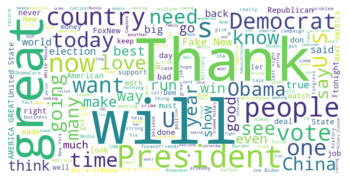

In [15]:
# Not deleted tweets
tweet_text =" ".join(tweet for tweet in undeleted_tweets)
tweet_text = re.sub(" &amp", ' ', tweet_text) # &amp
stopwords = set(STOPWORDS)
stopwords.update(["RT", "https", "http", "Donald", "Trump", "realDonaldTrump", "t", "co"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width = 800, height = 400).generate(tweet_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

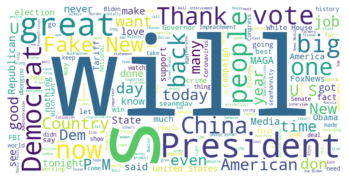

In [16]:
# Deleted tweets
tweet_text =" ".join(tweet for tweet in deleted_tweets)
tweet_text = re.sub(" &amp", ' ', tweet_text) # &amp
stopwords = set(STOPWORDS)
stopwords.update(["RT", "https", "http", "Donald", "Trump", "realDonaldTrump", "t", "co"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width = 800, height = 400).generate(tweet_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's do the same process, but with a more cleaned dataset, with the sentiments only.

In [17]:
data = pd.read_csv("../output/cleaned_dataset.csv")
print(data.shape)

(54682, 3)


In [18]:
data.head()

,sentiment_text,VADER,TextBlob
0,republicans democrats created economic problems,-1,1.0
1,thrilled_back great city charlotte north_carol...,1,1.0
2,read letter surveillance court obtained cbs ne...,0,1.0
3,unsolicited mail_ballot scam major threat demo...,-1,1.0
4,friendly telling events comey apparent leaking...,1,1.0


Wordcloud of all tweet sentiments

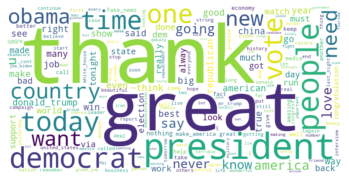

In [20]:
tweet_text =" ".join(tweet for tweet in data['sentiment_text'])
tweet_text = re.sub(" &amp", ' ', tweet_text) # &amp
stopwords = set(STOPWORDS)
stopwords.update(["RT", "https", "http", "Donald", "Trump", "realDonaldTrump", "t", "co"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width = 800, height = 400).generate(tweet_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()